## Data Exploration and Preprocessing:
Explore the dataset to understand its structure and identify any missing values or outliers. Preprocess the data as necessary, including handling missing values, scaling numerical features, encoding categorical variables, etc.


In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def view_housing_data(file_path):
    # Read the CSV file into a DataFrame
    try:
        housing_data = pd.read_csv(file_path)
        # Display the first few rows of the DataFrame
        display(housing_data.head())
        return housing_data
    except FileNotFoundError:
        print("File not found. Please check the file path and try again.")
        return None

# Specify the path to your housing.csv file
file_path = "/Users/sm/Developer/Projects/Calefornia Housing Prices/data/housing.csv"

# Call the function to view the housing data
housing_df = view_housing_data(file_path)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [135]:
#info method to get description of data 
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [136]:
#info to see how many missing values we have
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Handling missing values


In [137]:
#Let's subset our dataframe to include all NaN values for our total_bedrooms
total_bedrooms_missing = housing_df[housing_df['total_bedrooms'].isna()]

total_bedrooms_missing[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


We can choose to either get rid of the coresspondeing districtis that have theese 207 values, the whole attribute or use imputation to subset for missing values. Let's go by imputation, as the amount of missing values in relation to our whole dataset is very low. 

Now a better way to do this to make sure that we do not have any missing values in our test_set or training set is to use SimpleIMputer from sklean. 

The benenift is that it will store the median value of all our attributes, which enables us to impute missing value on our test_Set, training_Set, validation_set and any other new data in the future. 


In [138]:
#import relevant library
from sklearn.impute import SimpleImputer

#impute is an estimator, which a strategy "median" works as hyperparameter tuning
imputer = SimpleImputer(strategy='median')

#since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity
housing_num = housing_df.select_dtypes(include=np.number)

#imputer has computed the median of each attribute and stored the result in its statistics_ instance variable.
imputer.fit(housing_num)

#transformer transforms our dataset.
x = imputer.transform(housing_num)

#x is a numpy array but does not have columns or index.
housing_transformed = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

housing_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [139]:
# Replace the numerical columns in housing_df with the transformed ones
housing_df[housing_num.columns] = housing_transformed

# Now housing_df has the imputed values for all numerical columns and also includes the 'ocean_proximity' column
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [140]:
#imputer has computed the median of each attribute and stored the result in its statistics_ instance variable.
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [141]:
#same as applying 
housing_num.median().values 

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [142]:
#looking at total missing values again:
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [116]:
#"#alternative way to fill missing values

#compute the median
median_bedrooms = housing_df['total_bedrooms'].median()

#fill our missing values in housing_Df
#housing_df['total_bedrooms'].fillna(median_bedrooms, inplace=True) 

#looking at total missing values again:
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Handling missing values: Text and categorical values

One-hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. 

With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0. Each integer value is represented as a binary vector.


In [143]:
housing_cat = housing_df['ocean_proximity']

housing_cat.head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [144]:
#Applying one-hot-encoding using sckit-learn
from sklearn.preprocessing import OneHotEncoder

#initializing an instance of the OneHotEncoder class from sklearn.preprocessing and assigning it to the variable cat_encoder
cat_encoder = OneHotEncoder() #alternatively you can set spare=False to return an array instead of a sparse matrix.

housing_cat_1hot = cat_encoder.fit_transform(housing_df[['ocean_proximity']])

In [145]:
#outputs sparse matrix
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [146]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

The OneHotEncoder class from sklearn.preprocessing returns a sparse matrix by default when you use its transform method. 
- A sparse matrix is a matrix in which most of the elements are zero. Internally it only stroes the nonzero values and their position
- In the context of one-hot encoding, a sparse matrix is often used because it is a more memory-efficient way to store large matrices.
- Storing all zeros in a regular dense (numpy array) can take alot of memory


note: to convert the sparse matrix to a dense NumPy array, use the toarray method:
housing_cat_1hot.toarray() 

In [147]:
#ALTERNATIVE METHOD This will create a new column for each unique value in ocean_proximity, and assign a 1 or 0 (True/False) to those
housing_df_updated = pd.get_dummies(housing_df, columns=['ocean_proximity'])

housing_df_updated.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


There are some differences that might make OneHotEncoder more suitable for certain situations:
1. Handling Unknown Categories: OneHotEncoder can handle unseen categories (categories that were not in the training data but appear in the test data). It has a parameter handle_unknown that you can set to 'ignore' to ignore unseen categories. pd.get_dummies does not have this feature.



## Feature scaling and transformation
- Machine LEarning algorthims do not perform well when input attributes have different scales
- Example for the housing data, total number of rooms are from 6 to 39320, while median for income ranges 0 to 15, same applies to population

There are two common ways to get all attributes to have same scale: 
- Min-max scaling and standardisation


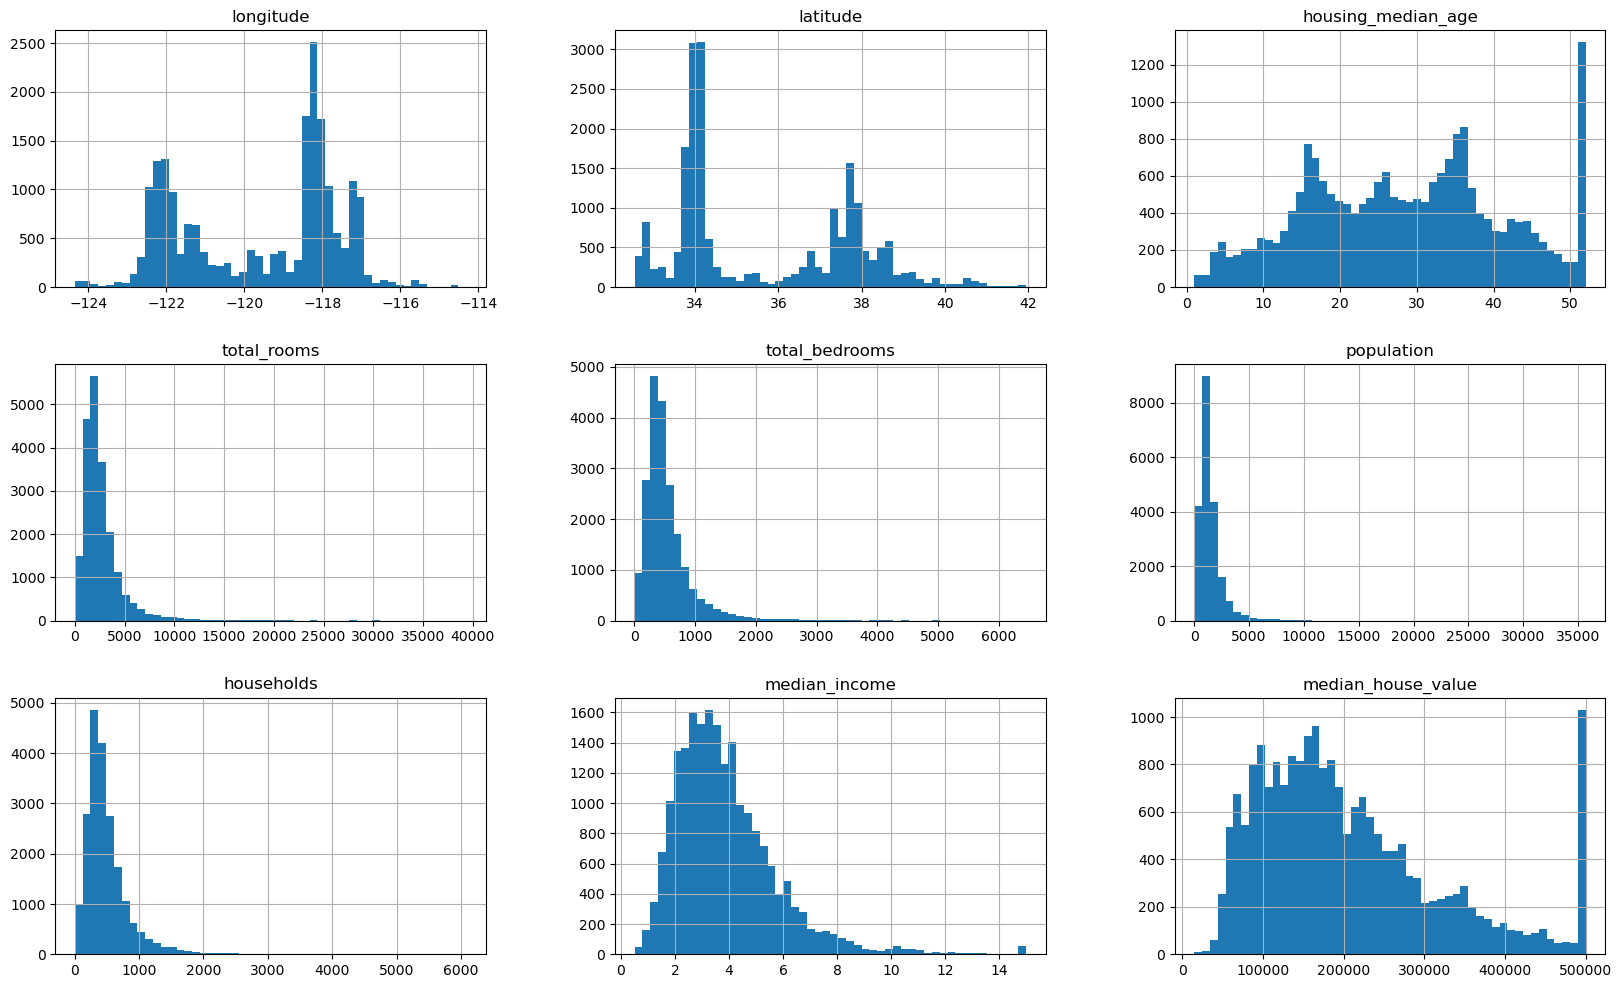

In [148]:
target =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

#let's visulize this in a histogram
housing_df_updated[target].hist(bins=50, figsize=(20, 12))
 
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

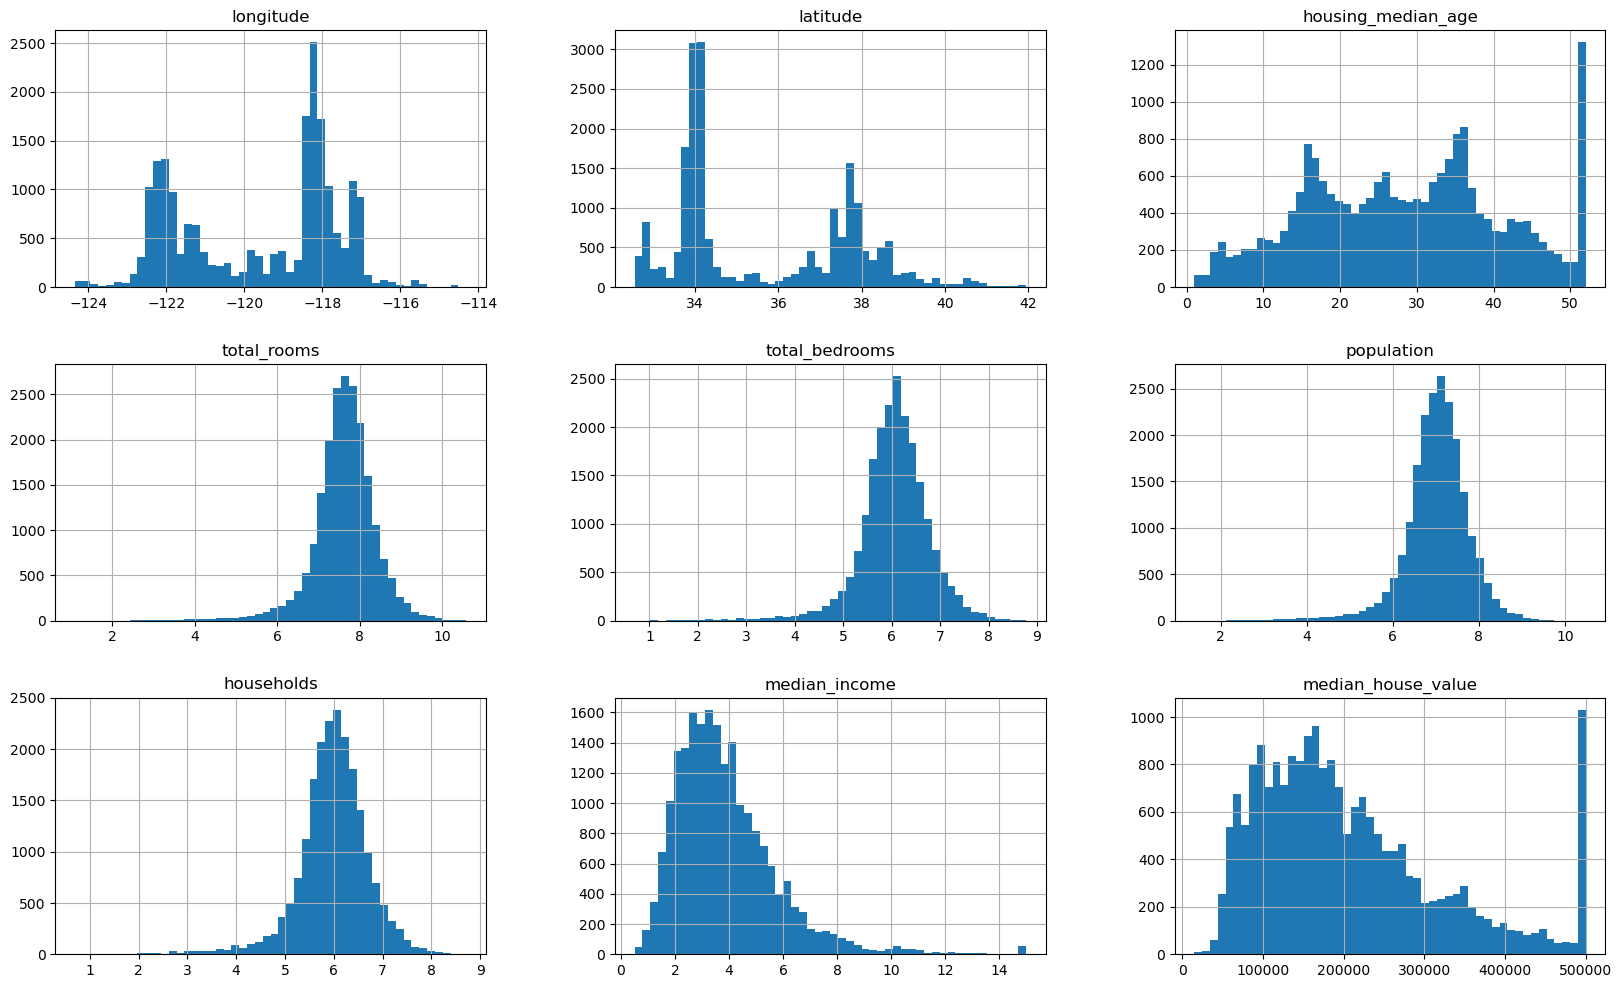

In [158]:
#Alternatively to the above ^^^^^
# Make a copy of the original DataFrame
housing_df_original = housing_df_updated.copy()

# List of columns to apply log transformation
cols_to_transform = ["total_rooms", "total_bedrooms", "population", "households"]

# Apply the log transformation
for col in cols_to_transform:
    housing_df_updated[col] = np.log1p(housing_df_updated[col])
    
    
housing_df_updated[target].hist(bins=50, figsize=(20, 12))


Now total_rooms, bedrooms popopulation and households looks like to be much more closer to a Gaussian Distribution.
- When a feature has a multimodal distribution (with two or more clear peaks), such as housing_median we can use similiarty measure using radical basis function RBF. 

RBF will measure the similiarty between housing median age and 35. 

Remember fittting scalers is only for the training the data, never use fit() or fit_transformed() for anything else than the training set. Once you have a trained scalar you can use it transform other sets, including validation, test and new data. 


## Customer Transformers

Let's apply a customer transformer, for writing our own tasks, clanup etc. For transfromation that input heavy-tailed distribtuionts, we can replace theese with their logaritm. Let's creata  alog-transformer and apply to popoulation feature. 
- Also we can apply the same on total_rooms, bedrooms, housholds and even  housing_median_age

In [160]:
#Another way to transform:

from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel

log_transformer = FunctionTransformer(np.log1p, validate=True)
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))

log_total_rooms = log_transformer.fit_transform(housing_df_updated[["total_rooms"]])
log_total_bedrooms = log_transformer.fit_transform(housing_df_updated[["total_bedrooms"]])
log_households = log_transformer.fit_transform(housing_df_updated[["households"]])
log_pop = log_transformer.fit_transform(housing_df_updated[["population"]])

age_simil_35 = rbf_transformer.fit_transform(housing_df_updated[["housing_median_age"]])

Data for median income, has been scaled and capped at 0.5 for lower median income and 15 for maximum median incomes. 

Housing median age and median house value has also been capped. 

## Visualizing Geographical Data
Let's see if we can visualize a map of the longtitude and latitude to gain some more information 

red is expensive,
blue is cheaper
larger circles indicate denser areas with larger popoulation

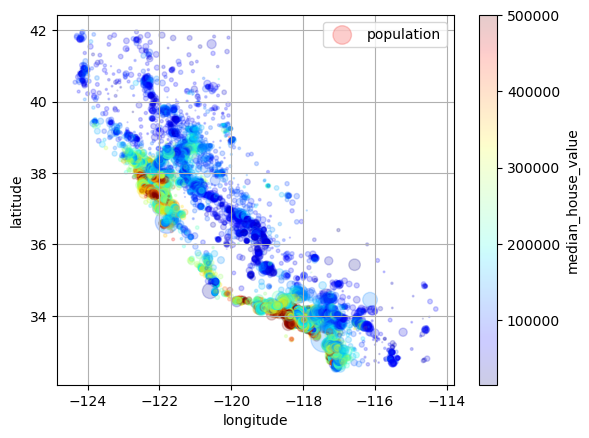

In [12]:
housing_df.plot(kind="scatter", x='longitude', y='latitude', grid=True, alpha=0.2, 
                s=housing_df['population'] / 100, label = "population", 
                c="median_house_value", cmap="jet", colorbar=True, legend=True)
plt.show()

## Looking for correlations
Let's take a look how our target varible is correlated in relation to the other variables. The correlation coefficient ranges between from -1 to 1.
closer to 1, indicates strong positive correlcation, while -1 indiciate a strong negative correlation. 



In [13]:
corr_matrix = housing_df.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

It looks like there is a negative correlation with median house value as you tend to go farther north. In other words, prices go down
- latitude: A measure of how far north a house is; a higher value is farther north

Let's take a further look using the pandas scatter_matrix() plotting our numerical attributes against all other attributes. We will pick those attributes that are mostly correlated.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

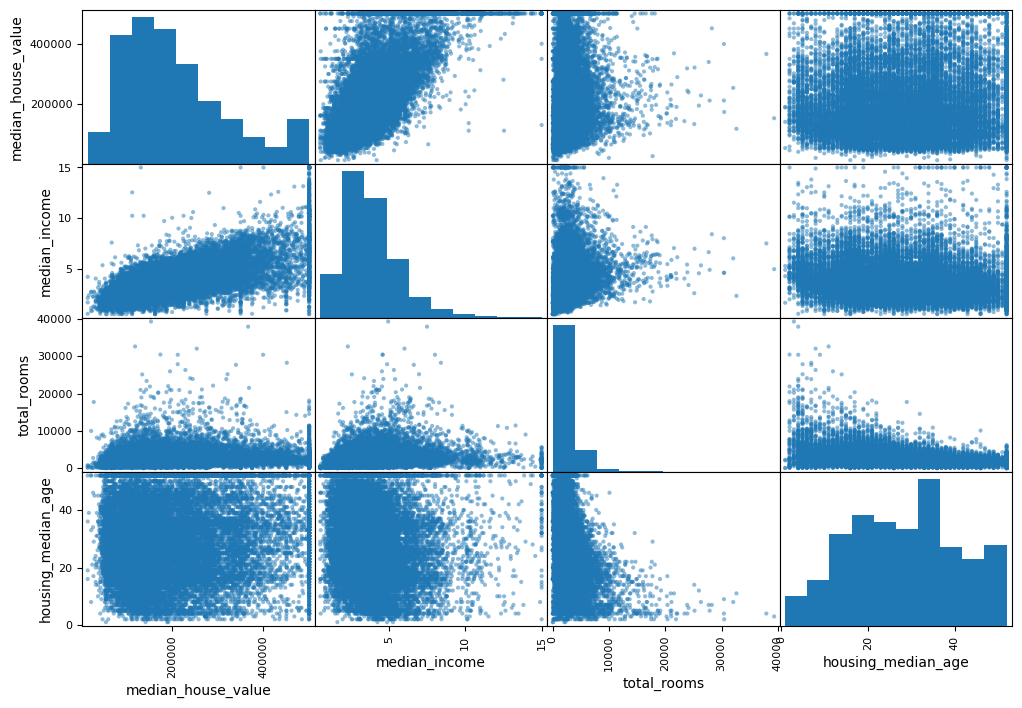

In [14]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing_df[attributes], figsize=(12,8))

This scatter matrix shows every numerical attribute against every other numeric attribute, including a histogram for each on the main diagonal (bottom right and top left). 

It looks like the most promising attribute to predict median house value, is the median income. Let's take a further look

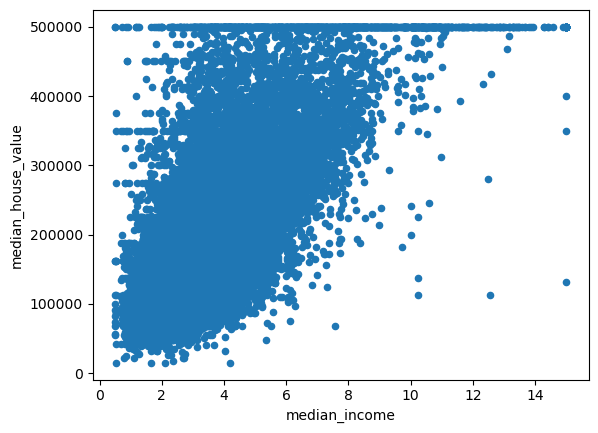

In [15]:
housing_df.plot(kind="scatter", x="median_income", y="median_house_value")
plt.show()

There seems to be an upward trend, and the points are not to dispersed either. Furthermore, we see the price-cap of $500.000 as a horisontal line. Let's try to remove this.

## 2. Feature Engineering: Extract meaningful features from the existing data or create new features that may improve the model's performance.

Let's take a look at feature engineern to see if there are other attributes worth looking at. I will focus on the following:

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

In [16]:
#Creating new features
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households'] 
housing_df['bedroom_ratio'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df['people_per_household'] = housing_df['population'] / housing_df['households']

#Similar as above, look at the correlation between median_house_value and our new variables:
corr_matrix = housing_df.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)



median_house_value      1.000000
median_income           0.688075
rooms_per_household     0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049457
people_per_household   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedroom_ratio          -0.233303
Name: median_house_value, dtype: float64

It looks like bedroom ratio is more correlated to median_house_value when compared to the rooms_per_household and total_rooms. 
Houses with lower_bedroom_Ratio tends to be more expensive.

In [17]:
from sklearn.model_selection import train_test_split

def create_train_test_sets(data, test_size=0.2, random_state=None):
    """
    Split the dataset into training and test sets.

    Args:
    - data (pandas.DataFrame): DataFrame containing the housing data.
    - test_size (float or int, optional): The proportion of the dataset to include in the test split. Default is 0.2 (20%).                                   
    - random_state (int or RandomState, optional): Controls the randomness of the split.  Default is None.

    Returns: tuple: A tuple containing the training set and test set DataFrames.
    """
    
    # Split the dataset into features (X) and target variable (y)
    X = data.drop(columns=["median_house_value"])  # Features (independent variables)
    y = data["median_house_value"]  # Target variable (dependent variable)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test


# Call the function to create training and test sets
X_train, X_test, y_train, y_test = create_train_test_sets(housing_df, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)


Training set - Features: (16512, 12) Target: (16512,)
Test set - Features: (4128, 12) Target: (4128,)


In [18]:
## 2. Feature Engineering: Extract meaningful features from the existing data or create new features that may improve the model's performance.